# Quantum Fourier Transform
### Custom written QFT algorithm compared with Qiskit's implementation

In [1]:
import numpy as np
pi=np.pi

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def swap_all(circuit):
    qb=circuit.qubits
    nqubits=len(qb)
        
    for i in range(nqubits//2):
        circuit.swap(qb[i],qb[nqubits-i-1])
        
    return circuit

myQFT circuit for 4 qubits


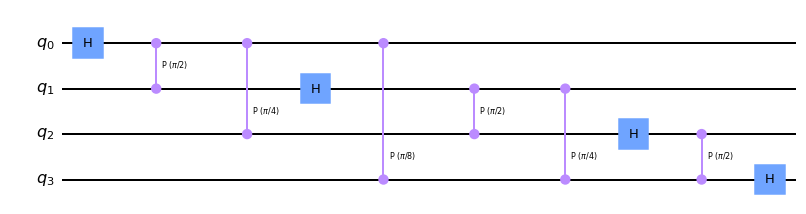

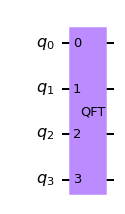

In [4]:
def myQFT(nqubits):
    
    circ = QuantumCircuit(nqubits)
    
    for qbt in range(nqubits):
        circ.h(qbt)
        for next_qbt in range(qbt+1,nqubits):
            circ.cp(pi/(2**(next_qbt-qbt)),next_qbt,qbt)
    
    return circ

print("myQFT circuit for 4 qubits")
display(myQFT(4).draw())
display(QFT(4).draw())

001 in Computational basis


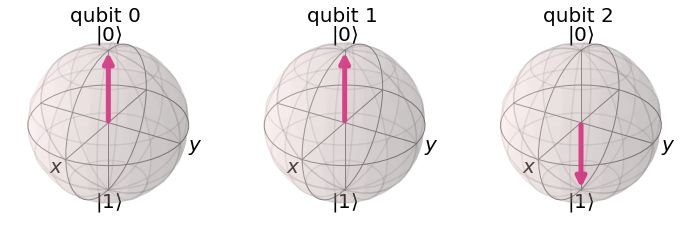

001 in Fourier basis


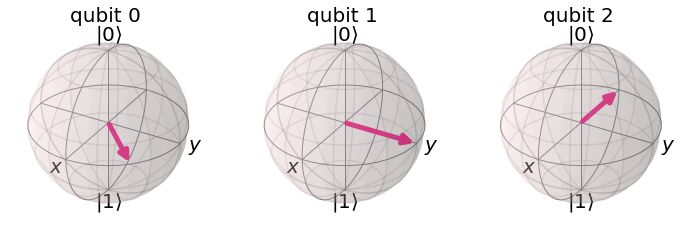

001 in Fourier basis


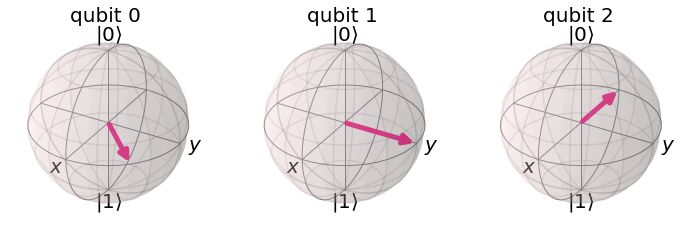

In [5]:
# Input state in computational bases
state='001'

# Using myQFT
circ=QuantumCircuit(len(state))
circ.initialize(Statevector.from_label(state).data,qubits=circ.qubits[::-1])
print(state+" in Computational basis")
display(plot_bloch_multivector(Statevector.from_instruction(circ).data))
circ.append(myQFT(len(state)), circ.qubits)
print(state+" in Fourier basis")
display(plot_bloch_multivector(Statevector.from_instruction(circ).data))


# Using Qiskit's QFT
lib_circ=QuantumCircuit(len(state))
lib_circ.initialize(Statevector.from_label(state).data,qubits=lib_circ.qubits)
lib_circ.append(QFT(len(state)), lib_circ.qubits)
print(state+" in Fourier basis")
display(plot_bloch_multivector(Statevector.from_instruction(lib_circ).data))
